In [11]:
from soview import *
import pandas as pd


In [2]:
sc_file = '/aaa/jianhuayao/project2/zhiyuanyuan/PUBDT/st/mibi/liu2022reproducible/data/datatables/cell_table_size_normalized_clusters.csv'

In [4]:
df = pd.read_csv(sc_file)

In [6]:
df.columns

Index(['phenotype_num', 'phenotype', 'cluster', 'cell_size', 'CD11c', 'CD20',
       'CD3', 'CD31', 'CD4', 'CD45', 'CD56', 'CD68', 'CD8', 'HLA DR',
       'HLA class 1 A, B, and C, Na-K-ATPase alpha1', 'PANCK', 'PAX5',
       'Vimentin', 'beta-tubulin', 'dsDNA', 'label', 'area', 'eccentricity',
       'major_axis_length', 'minor_axis_length', 'perimeter', 'convex_area',
       'equivalent_diameter', 'centroid-0', 'centroid-1',
       'major_minor_axis_ratio', 'perim_square_over_area',
       'major_axis_equiv_diam_ratio', 'convex_hull_resid', 'centroid_dif',
       'num_concavities', 'fov'],
      dtype='object')

In [5]:
df

,phenotype_num,phenotype,cluster,cell_size,CD11c,CD20,CD3,CD31,CD4,CD45,...,equivalent_diameter,centroid-0,centroid-1,major_minor_axis_ratio,perim_square_over_area,major_axis_equiv_diam_ratio,convex_hull_resid,centroid_dif,num_concavities,fov
0,1,B_cell,69,102,0.068627,0.088235,0.078431,0.029412,0.127451,0.068627,...,11.396071,3,200,1.586641,14.108494,1.281985,0.009709,0.005330,0,201001_Slide23Stain2Run_shuffled_Point10_R6C7
1,2,Epithelial,97,180,0.088889,0.083333,0.105556,0.122222,0.333333,0.061111,...,15.138795,5,533,1.203604,14.296234,1.117674,0.032258,0.004031,0,201001_Slide23Stain2Run_shuffled_Point10_R6C7
2,2,Epithelial,89,385,0.106494,0.062338,0.135065,0.646753,0.249351,0.059740,...,22.140398,6,576,2.088272,19.120693,1.530146,0.085511,0.024349,1,201001_Slide23Stain2Run_shuffled_Point10_R6C7
3,2,Epithelial,87,52,0.134615,0.076923,0.192308,0.211538,0.750000,0.096154,...,8.136858,1,758,1.841057,14.747468,1.409013,0.018868,0.009242,0,201001_Slide23Stain2Run_shuffled_Point10_R6C7
4,3,Endothelial,93,63,0.190476,0.095238,0.142857,2.238095,0.507937,0.015873,...,8.956232,2,991,2.202124,15.942976,1.524205,0.015625,0.006913,0,201001_Slide23Stain2Run_shuffled_Point10_R6C7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345485,1,B_cell,9,163,0.079755,1.208589,0.134969,0.049080,0.134969,0.748466,...,14.406181,1019,641,1.880445,15.787252,1.406237,0.041176,0.008139,0,201008_Slide25Stain6Run_shuffled_6b_Point9_R1C7
345486,1,B_cell,59,142,0.112676,0.514085,0.056338,0.091549,0.084507,0.295775,...,13.446190,1019,666,2.285800,19.325104,1.587338,0.046980,0.010582,0,201008_Slide25Stain6Run_shuffled_6b_Point9_R1C7
345487,1,B_cell,9,280,0.057143,0.775000,0.078571,0.046429,0.178571,0.739286,...,18.881395,1017,932,1.488277,15.092116,1.254070,0.031142,0.008839,0,201008_Slide25Stain6Run_shuffled_6b_Point9_R1C7
345488,1,B_cell,30,198,0.040404,0.772727,0.085859,0.025253,0.121212,0.747475,...,15.877702,1017,976,1.439411,15.472417,1.240868,0.038835,0.006871,0,201008_Slide25Stain6Run_shuffled_6b_Point9_R1C7


In [7]:
protein_list = ['CD11c', 'CD20',
       'CD3', 'CD31', 'CD4', 'CD45', 'CD56', 'CD68', 'CD8', 'HLA DR',
       'HLA class 1 A, B, and C, Na-K-ATPase alpha1', 'PANCK', 'PAX5',
       'Vimentin', 'beta-tubulin', 'dsDNA']

In [13]:
adata = ad.AnnData(df[protein_list])

/tmp/ipykernel_1014/1733387411.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(df[protein_list])
/root/anaconda3/envs/SOView/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '345480', '345481', '345482', '345483', '345484', '345485', '345486',
       '345487', '345488', '345489'],
      dtype='object', length=345490)

In [18]:
df['major_minor_axis_ratio'].values

array([1.58664072, 1.20360366, 2.08827174, ..., 1.48827653, 1.43941072,
       2.39744467])

In [19]:
for i in df.columns:
    if i not in protein_list:
        adata.obs[i] = df[i].values
        

In [22]:
np.vstack([adata.obs['centroid-0'],adata.obs['centroid-1']])

(2, 345490)

In [23]:
adata.obsm['spatial'] = np.vstack([adata.obs['centroid-0'],adata.obs['centroid-1']]).transpose()

In [24]:
adata

AnnData object with n_obs × n_vars = 345490 × 16
    obs: 'phenotype_num', 'phenotype', 'cluster', 'cell_size', 'label', 'area', 'eccentricity', 'major_axis_length', 'minor_axis_length', 'perimeter', 'convex_area', 'equivalent_diameter', 'centroid-0', 'centroid-1', 'major_minor_axis_ratio', 'perim_square_over_area', 'major_axis_equiv_diam_ratio', 'convex_hull_resid', 'centroid_dif', 'num_concavities', 'fov'
    obsm: 'spatial'

In [27]:
np.unique(adata.obs['fov'])

array(['201001_Slide23Stain2Run_shuffled_Point10_R6C7',
       '201001_Slide23Stain2Run_shuffled_Point11_R1C4',
       '201001_Slide23Stain2Run_shuffled_Point12_R2C10',
       '201001_Slide23Stain2Run_shuffled_Point13_R1C8',
       '201001_Slide23Stain2Run_shuffled_Point14_R8C5',
       '201001_Slide23Stain2Run_shuffled_Point15_R2C11',
       '201001_Slide23Stain2Run_shuffled_Point16_R7C6',
       '201001_Slide23Stain2Run_shuffled_Point17_R4C1',
       '201001_Slide23Stain2Run_shuffled_Point18_R8C10',
       '201001_Slide23Stain2Run_shuffled_Point19_R3C3',
       '201001_Slide23Stain2Run_shuffled_Point1_R8C9',
       '201001_Slide23Stain2Run_shuffled_Point20_R1C6',
       '201001_Slide23Stain2Run_shuffled_Point21_R3C4',
       '201001_Slide23Stain2Run_shuffled_Point22_R7C7',
       '201001_Slide23Stain2Run_shuffled_Point23_R3C2',
       '201001_Slide23Stain2Run_shuffled_Point24_R6C10',
       '201001_Slide23Stain2Run_shuffled_Point25_R2C12',
       '201001_Slide23Stain2Run_shuffled_Poi

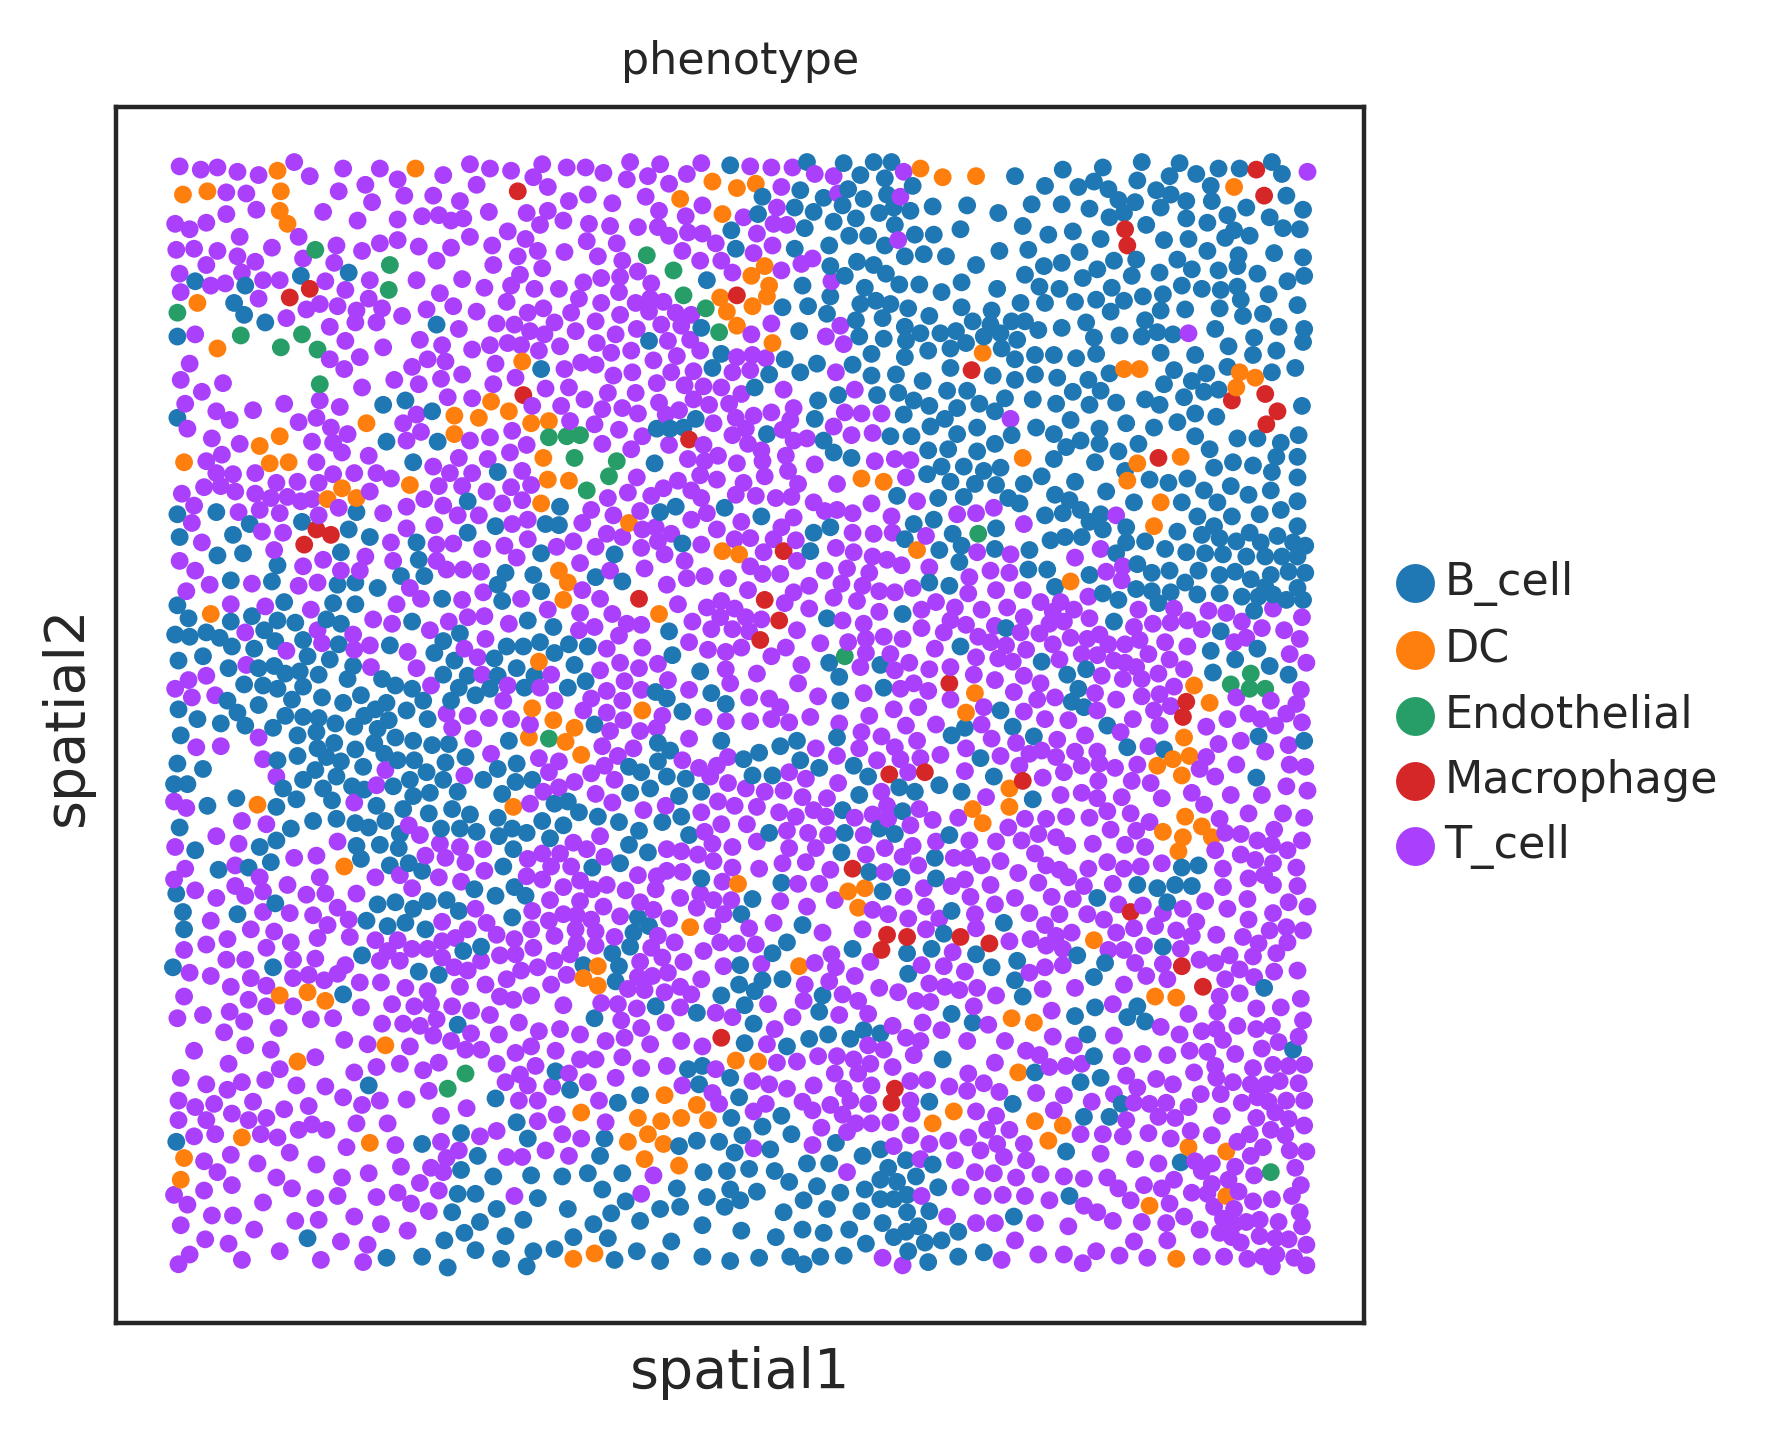

In [31]:
sc.pl.embedding(adata[adata.obs['fov']=='201008_Slide25Stain6Run_shuffled_6b_Point9_R1C7'],basis='spatial',color='phenotype')

In [32]:
h5ad_path = '/aaa/jianhuayao/project2/zhiyuanyuan/PUBDT/st/mibi/liu2022reproducible/h5ad_sc'

In [33]:
for fov in np.unique(adata.obs['fov']):
    cur_a = adata[adata.obs['fov']==fov]
    cur_a.write_h5ad(f'{h5ad_path}/{fov}.h5ad')